In [142]:
from depthCamera import DepthCamera
from cone import Cone

src_video = "video/Video2ProvaSeriaIndoorCurva.bag"
src_settings = 'default'
verbose = True

dc = DepthCamera(src_video, src_settings, verbose)

Utilizzate specifiche di default
Caricamento registrazione da file...


In [143]:
# codice di support per visualizzare le immagini
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

def show_image(image, title="Image", cmap=None):
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=cmap)
	plt.title(title)
	plt.show()

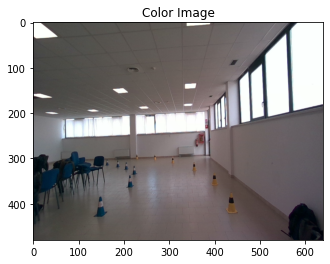

In [144]:
o_depth_frame, o_color_frame, *_ = dc.get_frame()

o_depth_frame, o_color_frame = cv2.resize(o_depth_frame, (640, 480)), cv2.resize(o_color_frame, (640, 480))

color_image = o_color_frame.copy()
depth_image = o_depth_frame.copy()

original_frame_dim = color_image.shape[:2]

FRAME_WIDTH = 640 * 2
FRAME_HEIGHT = 640

def get_original_pixel(x, y, original_frame_dim):
	"""
	Ritorna le coordinate originali del frame prima del resize
	"""
	
	print(x, y, original_frame_dim, FRAME_WIDTH, FRAME_HEIGHT)

	return int(round(x * original_frame_dim[1] / FRAME_WIDTH)), int(round(y * original_frame_dim[0] / FRAME_HEIGHT))

show_image(color_image, "Color Image")

In [145]:
from coneDetection import ConeDetector

cuda = 'cpu'

cd = ConeDetector(cuda, '640x32.pt', verbose=verbose)

depth_image = cv2.resize(depth_image, (FRAME_WIDTH, FRAME_HEIGHT), interpolation = cv2.INTER_AREA)
color_image = cv2.resize(color_image, (FRAME_WIDTH, FRAME_HEIGHT), interpolation = cv2.INTER_AREA)

cones = cd.forward(color_image)

cone = cones[0]

x1, y1, x2, y2, conf = cone

print(cone)



Using device "cpu"
Fusing layers... 
Image size: 640
Using device "cpu"
Fusing layers... 
Image size: 640

Processing results:

Processing results:
	[280,508] [318,570]	confidence: 86%
	[418,447] [440,485]	confidence: 85%
	[406,411] [417,432]	confidence: 74%
	[213,498] [260,562]	confidence: 94%
	[440,421] [454,447]	confidence: 72%
	[368,405] [380,425]	confidence: 72%
	[320,403] [335,419]	confidence: 55%
	[611,395] [621,413]	confidence: 45%
	[147,440] [175,480]	confidence: 90%
[280, 508, 318, 570, 86]


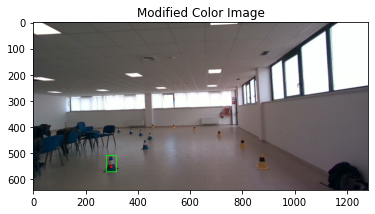

In [146]:
color_frame_cp = color_image.copy()

c = Cone.from_frame(color_image, depth_image, x1, y1, x2, y2, color_frame_cp, True)
x, y = c.point[0], c.point[1]


cv2.rectangle(color_frame_cp, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.circle(color_frame_cp, (x, y), 5, (0, 0, 255), -1)


show_image(color_frame_cp, "Modified Color Image")

MOD: 299 551
299 551 (480, 640) 1280 640
ORIGIN: 150 413
280 508 (480, 640) 1280 640
318 570 (480, 640) 1280 640
BB: 140 381 159 428
(480, 640, 3)
(640, 1280, 3)


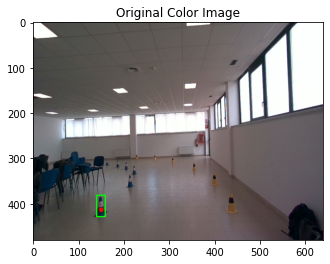

In [147]:
print("MOD:", x, y)

xx, yy = get_original_pixel(x, y, original_frame_dim)

print("ORIGIN:", xx, yy)

xx1, yy1 = get_original_pixel(x1, y1, original_frame_dim)
xx2, yy2 = get_original_pixel(x2, y2, original_frame_dim)

print("BB:", xx1, yy1, xx2, yy2)

print(o_color_frame.shape)
print(color_image.shape)

RED = (0, 0, 255)

cv2.rectangle(o_color_frame, (x1, y1), (x2, y2), RED, 2)

cv2.rectangle(o_color_frame, (xx1, yy1), (xx2, yy2), (0, 255, 0), 2)
cv2.circle(o_color_frame, (xx, yy), 5, (0, 0, 255), -1)



show_image(o_color_frame, "Original Color Image")

In [148]:
distance = c.distance

print("Distance:", distance)

from positionRT import position

p_r = position(x, y, distance)
print("POSIZIONE DI PRIMA: ", p_r)

p_r = position(xx, yy, distance)
print("POSIZIONE ORA: ", p_r)

Distance: 3.51
POSIZIONE DI PRIMA:  [       3.51      1.8605     -1.0421]
POSIZIONE ORA:  [       3.51      2.6734    -0.28917]
